In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df=pd.read_csv("D:/인공지능개론/AAME.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.00,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.00,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.00,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.00,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.00,3.95,3.75,3.75,3.129709,12700
...,...,...,...,...,...,...,...
10093,2020-03-26,2.29,2.29,2.08,2.28,2.280000,1600
10094,2020-03-27,2.25,2.25,2.21,2.25,2.250000,500
10095,2020-03-30,2.25,2.25,2.13,2.13,2.130000,400
10096,2020-03-31,2.11,2.11,2.11,2.11,2.110000,300


In [31]:
openValues=df[['Open']]

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0, 1))
scaled=scaler.fit_transform(openValues)

In [33]:
#훈련 데이터 테스트 데이터 분류
TEST_SIZE=2000
train_data=scaled[:-TEST_SIZE]
test_data=scaled[-TEST_SIZE:]

In [34]:
def make_sample(data, window):
    X, y=[], []
    for i in range(len(data)-window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)
X_train, y_train=make_sample(train_data, 30)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(16, input_shape=(X_train.shape[1], 1), 
               activation='tanh',
               return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=16)
          

D:\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
505/505 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - loss: 0.0075
Epoch 2/100
505/505 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0026
Epoch 3/100
505/505 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0033
Epoch 4/100
505/505 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.0028
Epoch 5/100
505/505 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.0031
Epoch 6/100
505/505 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0033
Epoch 7/100
505/505 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0029
Epoch 8/100
505/505 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0026
Epoch 9/100
505/505 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0027
Epoch 10/100
505/505 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0028
Epoch 11/100
505/505 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0027
Epoch 12/100
505/505 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0026
Epoch 13/100
505/505 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0028
Epoch 14/100
505/505 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.0028
Epoch 15/100
505/505 ━━━━━━━

62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step


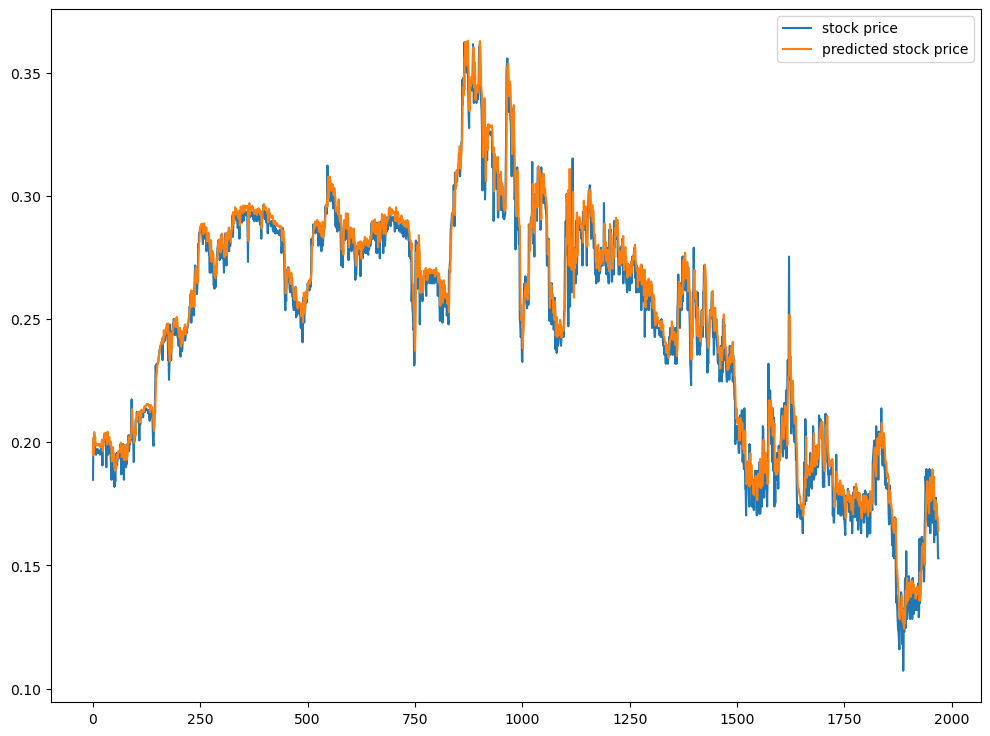

In [36]:
X_test, y_test=make_sample(test_data, 30)
pred=model.predict(X_test)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.plot(y_test, label='stock price')
plt.plot(pred, label='predicted stock price')
plt.legend()
plt.show()

In [37]:
print("MSE:", mean_squared_error(y_test, pred))
print("MAE:", mean_absolute_error(y_test, pred))
print("R² score:", r2_score(y_test, pred))

MSE: 6.950883423345837e-05
MAE: 0.005980822957967834
R² score: 0.9712755625811613
